In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("/users/sujis/Downloads/Applied AI")
#Load Haberman.csv into a pandas dataFrame.
haberman=pd.read_csv('haberman.csv')

In [17]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [18]:
# (Q) What are the column names present in the Haberman Data Set?
print (haberman.columns)

Index([u'Age', u'Operation Year', u'Axil Node', u'Survival Status'], dtype='object')


In [19]:
# (Q) How many patients have will survive the cancer present in the dataset ?
# 1 in Suv_status represents 1 = the patient survived 5 years or longer (Yes) 2 = the patient died within 5 year (No)
# Replaced the values of Survival Status with the strings for the better understanding.

haberman['Survival Status'] = haberman['Survival Status'].map({1: 'Survived', 2: 'Ceased'})
haberman['Survival Status'].value_counts()

#haberman is an unbalanced dataset as patients survival percentages are 73.5% & 26.4%

Survived    225
Ceased       81
Name: Survival Status, dtype: int64

**Observations**
1. The Haberman Dataset is an unbalanced dataset.
2. The patients survival ratio is approximately 3:1

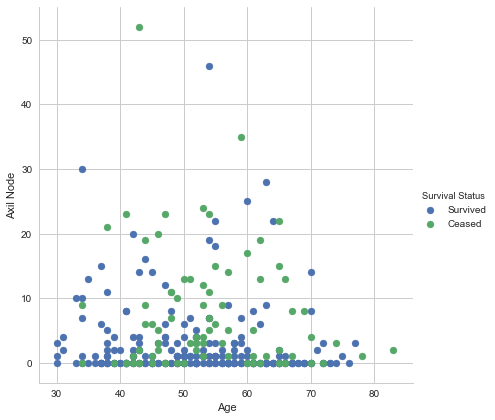

In [28]:
#2D Scatterplot with color coding for survival status
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival Status", size=6) \
   .map(plt.scatter, "Age", "Axil Node") \
   .add_legend();
plt.show();

**Observation(s):**
1. Seperating Survived patients from Ceased patients is much harder as the data points are very clumsy

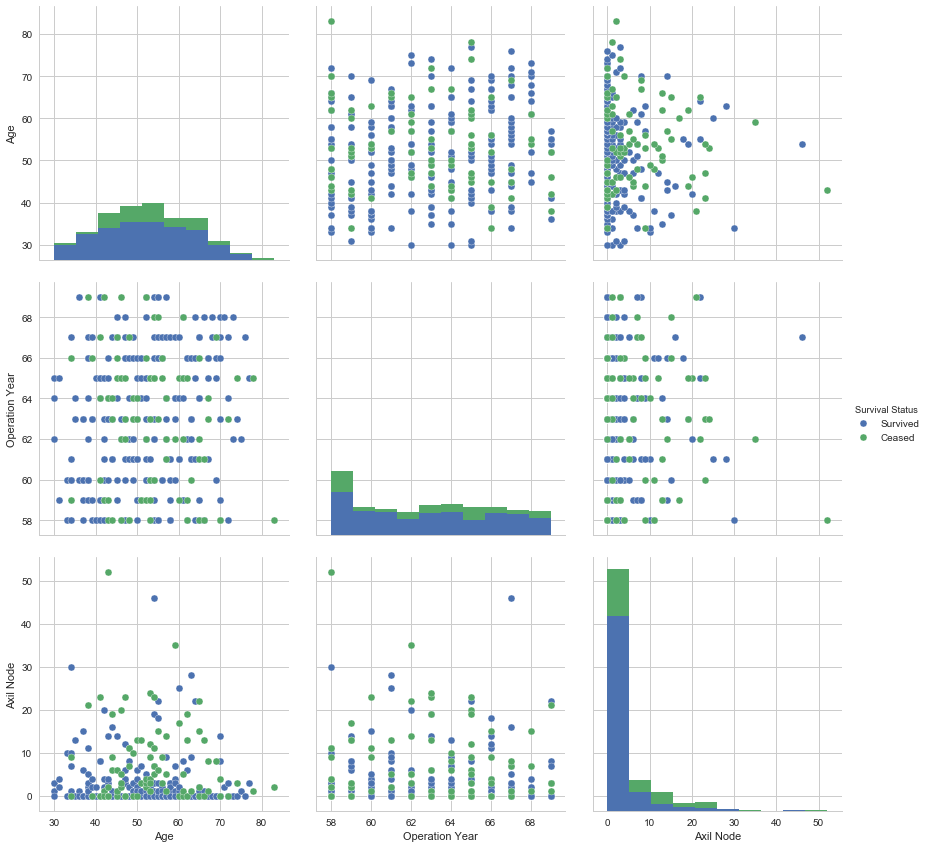

In [22]:
#Pair Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival Status", size=4);
plt.show()

**Oberservatons**
1. It is very dificult to define any conditions to classify patients survival status since both are overlapping extensively.

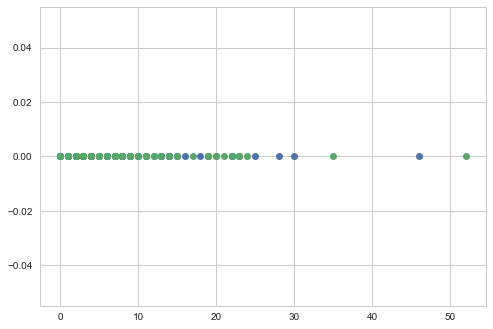

In [29]:
# What about 1-D scatter plot using just one feature?
import numpy as np
Survived= haberman.loc[haberman["Survival Status"] == "Survived"];
Ceased= haberman.loc[haberman["Survival Status"] == "Ceased"];

plt.plot(Survived["Axil Node"], np.zeros_like(Survived['Axil Node']), 'o')
plt.plot(Ceased["Axil Node"], np.zeros_like(Ceased['Axil Node']), 'o')

plt.show()


**Obersvations**
1. The 1D scatterplot won't give any understanding as they are overlapping a lot.

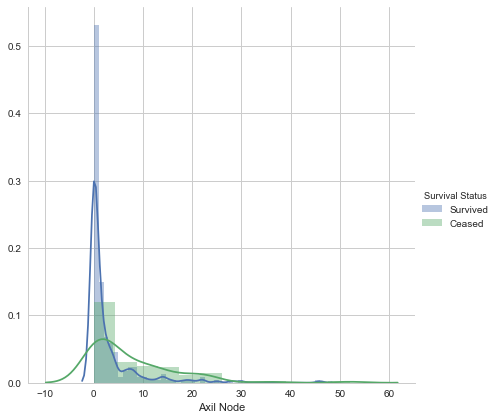

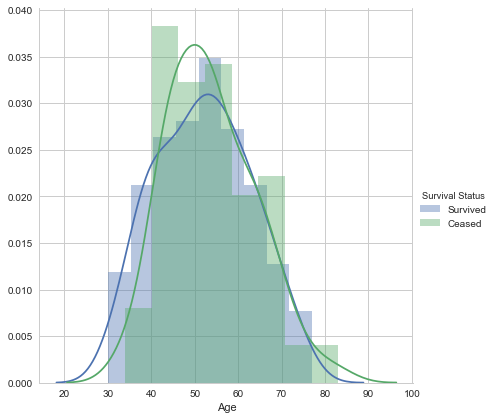

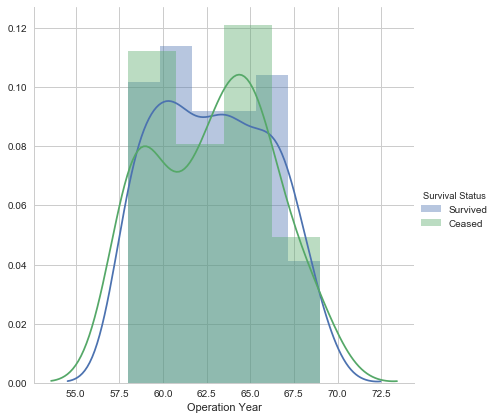

In [23]:
#Hisogram & PDF for each and every variable
sns.FacetGrid(haberman, hue="Survival Status", size=6) \
   .map(sns.distplot, "Axil Node") \
   .add_legend();
sns.FacetGrid(haberman, hue="Survival Status", size=6) \
   .map(sns.distplot, "Age") \
   .add_legend();
sns.FacetGrid(haberman, hue="Survival Status", size=6) \
   .map(sns.distplot, "Operation Year") \
   .add_legend();

plt.show();

**Observations**
1. By the historams of all variables in the dataset, Distribution of data points Axil Node is very narrow. On the other hand for Age & Operation Year, the disribution of data points is broad yet very hard to frame a logic to classify due to overlap.
2. Axil Node is the bes variable compared to Age & Operation year.

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


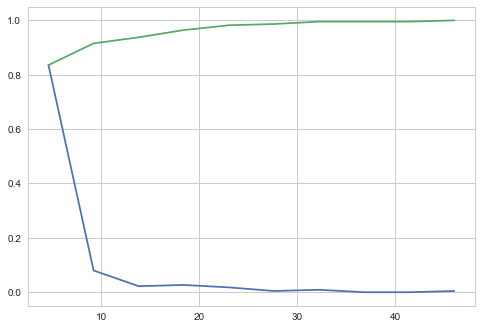

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


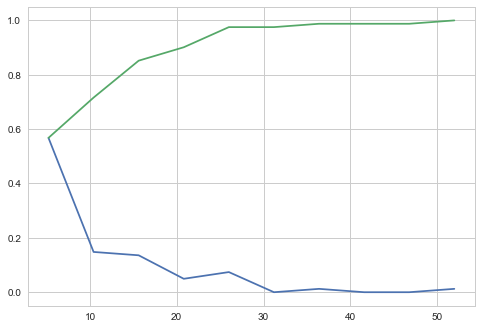

In [50]:
#Survived
counts, bin_edges = np.histogram(Survived['Axil Node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF of Survived Patients
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

#Ceased
counts, bin_edges = np.histogram(Ceased['Axil Node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF of Ceased Patients
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [43]:
#Univariate Analysis of "Axil Node"
#Mean, Variance, Std-deviation,  
print("Means:")
print('Survived',np.mean(Survived["Axil Node"]))
print('Ceased',np.mean(Ceased["Axil Node"]))

print("\nStd-dev:");
print('Survived',np.std(Survived["Axil Node"]))
print('Ceased',np.std(Ceased["Axil Node"]))

print("\nMedian:")
print('Survived',np.median(Survived["Axil Node"]))
print('Ceased',np.median(Ceased["Axil Node"]))

from statsmodels import robust
print("\nMad:");
print('Survived',robust.mad(Survived["Axil Node"]))
print('Ceased',robust.mad(Ceased["Axil Node"]))

print("\nPercentiles:25% 50% 75% 100% ")
print('Survived',np.percentile(Survived["Axil Node"],np.arange(25, 125, 25)))
print('Ceased',np.percentile(Ceased["Axil Node"],np.arange(25, 125, 25)))

print("\nQuantiles:")
print('Survived',np.percentile(Survived["Axil Node"],90))
print('Ceased',np.percentile(Ceased["Axil Node"],90))

Means:
('Survived', 2.7911111111111113)
('Ceased', 7.45679012345679)

Std-dev:
('Survived', 5.857258449412131)
('Ceased', 9.128776076761632)

Median:
('Survived', 0.0)
('Ceased', 4.0)

Mad:
('Survived', 0.0)
('Ceased', 5.9304088740224081)

Percentiles:25% 50% 75% 100% 
('Survived', array([  0.,   0.,   3.,  46.]))
('Ceased', array([  1.,   4.,  11.,  52.]))

Quantiles:
('Survived', 8.0)
('Ceased', 20.0)


**Observations**
1. By seeing the output we can say that most of the data points in the "survived" class are 0, infact approximately 50% data points are less than "Zero(0)"
2. For "Ceased" class 50% data points are less than "4".

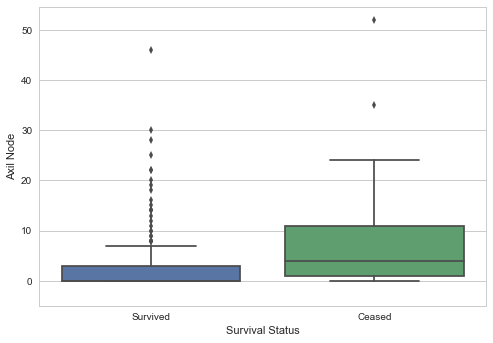

In [48]:
#Box Plot
sns.boxplot(x='Survival Status',y='Axil Node', data=haberman)
sns.plt.ylim(-5, None)
plt.show()

**Observations**
1. The Lower whisker, 25% and 50% are combined since the 50% data points are 0 and min data point is also 0.
2. The 75% Survived class quartile & 50% Ceased class has same number of Axil Nodes.

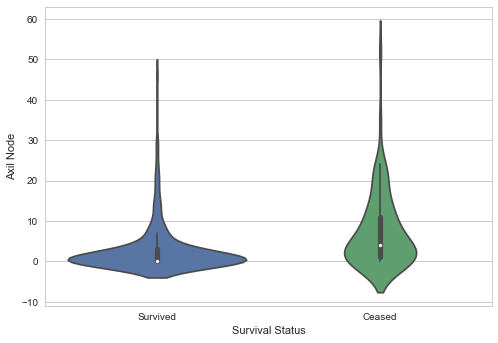

In [33]:
#Violin Plot
sns.violinplot(x="Survival Status", y="Axil Node", data=haberman, size=8)
plt.show()